# Gas Dynamical Friction

(This effect was used in Generozov&Perets 2022 [https://arxiv.org/abs/2212.11301].)

This effect can be used to model stars passing through thin disk around a massive black hole (that is particle 0). (This effect can also be used to model other systems, e.g. planets passing through a gas disc around a star).

We include two sources of a gas drag.

One is the dissipative force due to gas dynamical friction (GDF). We use the prescription in Ostriker 1999 [https://ui.adsabs.harvard.edu/abs/1999ApJ...513..252O/abstract] to model this force, viz.

\begin{align}
    \mathbf{f_{\rm drag}}=\mathbf{f_{\rm gdf}}=-\frac{4 \pi G^2 m_* \rho_g}{v_{\rm rel}^3} I({v_{\rm rel}/c_s}) \mathbf{v_{\rm rel}},
    \label{eq:fgdf}
\end{align}
where $\rho_g$ is the gas density, $m_*$ is the stellar mass, and $v_{\rm rel}$ is the relative velocity between the star and the disc. The function $I$ is

\begin{align}
    I(\mathcal M)=
    \begin{cases}
        \ln(\Lambda) & \mathcal M\geq 1\\
        \min\left[\ln \Lambda, \frac{1}{2}\log\left(\frac{1+\mathcal M}{1-\mathcal M}\right)-\mathcal M\right] & \mathcal M<1.
    \end{cases}
    \label{eq:Ib}
\end{align}

The Coulomb logarithm $ln(\Lambda)$ is constrolled by the parameter gas_df_xmin (gas_df_xmin = 1/$\Lambda$). For improved numerical stability we use 

\begin{align}
\frac{1}{2}\log\left(\frac{1+\mathcal M}{1-\mathcal M}\right)-\mathcal M \approx \mathcal M^3/3 + \mathcal M^5/5
\end{align}

for $\mathcal M<0.02$.

the disc gas density is 

\begin{align}
    \rho_g(r, z)= \rho_o
    \begin{cases}
        \left(\frac{r}{r_o}\right)^{-\gamma} \exp\left(-z^2/(2 h^2)\right) & z < 10 h\\
        0                                                                  & z \geq 10 h
    \end{cases}
    \label{eq:discDens}
\end{align}

where $r$ is the cylindrical radius. The power law index (gamma) of the density profile is specified by the user (via gas_df_alpha_rhog). The density normalization ($\rho_o/r_o^\gamma$) is specified by gas_df_rhog. The disc has a constant aspect ratio h/r that is specified by the user (gas_df_hr). 

We assume the azimuthal velocity of the gas is

\begin{align}
    v_{\phi}(r)=\left(1-\left(\frac{h}{r}\right)^2 \right) v_{\rm c}(r).
\end{align}
(see Armitage 2010, Astrophysics of Planet Formation, Cambridge University Press; we neglect a factor of order unity in front of the second term in parentheses). The sound speed in the disc is given by 

\begin{align}
    c_s(r)=c_{s,o} \left(\frac{r}{r_o}\right)^{\alpha}.
\end{align}

Above $\alpha$ is controlled by gas_df_alpha_cs. The normalization ($c_{s,o}/r_o^\alpha$) is controlled by gas_df_cs. 

Our implementation also includes geometric drag (see Just et al 2012, [https://ui.adsabs.harvard.edu/abs/2012ApJ...758...51J/abstract])

\begin{equation}
f_{\rm geo}= \left(\frac{v_{\rm rel}}{v_{\rm esc}}\right)^4 \frac{Q_d}{I} f_{\rm gdf}
\end{equation}
Above $v_{esc} = \sqrt{2 G m_*/r_*}$ is the escape speed from the star (with radius $r_*$). $Q_d$ is controlled by gas_df_Qd. 

In [2]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sim = rebound.Simulation()
sim.add(m=4e6, hash="bh") # SMBH
sim.add(m=1., a=206000, e=0.01, inc=0.17, hash="star")
sim.move_to_com()
sim.integrator = "BS"

import reboundx
rebx = reboundx.Extras(sim)
gdf = rebx.load_force("gas_dynamical_friction")
rebx.add_force(gdf)

gdf.params["gas_df_rhog"] = 0.2
gdf.params["gas_df_alpha_rhog"] = -1.5
gdf.params["gas_df_cs"] = 20
gdf.params["gas_df_alpha_cs"] = -0.5
gdf.params["gas_df_xmin"] = 0.045
gdf.params["gas_df_hr"] = 0.01
gdf.params["gas_df_Qd"] = 5.0

delta_t = 6.28e5
orb_data = np.zeros((100, 4))
for ii in range(100):
    sim.integrate(sim.t + delta_t)
    orb = sim.particles[1].orbit(primary = sim.particles[0])
    orb_data[ii] = (sim.t, orb.a, orb.e, orb.inc)

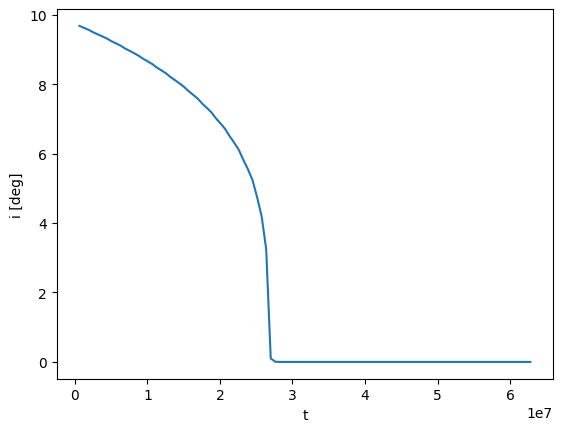

In [3]:
fig,ax = plt.subplots()
ax.set_ylabel('i [deg]')
ax.set_xlabel('t')
ax.plot(orb_data[:,0], orb_data[:,3] * 180. / np.pi)